In [127]:
import pandas as pd
import numpy as np
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt
from scipy import optimize

In [128]:
def GetRegression(x,y):
    m,b = np.polyfit(x,y,1)
    X = np.linspace(min(x),max(x),100)
    Y = m*X + b
    return X,Y,m,b

def GetUncertainty(m,b,x,y):
    Sum = np.sum((y - m*x - b)**2)
    N_2 = len(y)-2
    S_y = np.sqrt(Sum/N_2)
    N = len(y)
    denominator = N*np.sum(x**2) - (np.sum(x))**2
    S_m = S_y*np.sqrt(N/denominator)
    S_b = S_y*np.sqrt(np.sum(x**2)/denominator)
    un_M = S_m
    un_B =S_b
    return un_M,un_B

def GetR2(m, b, x, y):
    # Cálculo de la "bondad" del ajuste con base en el parámetro R^2:
    mean_y = np.sum(y)/len(y)
    reg_y = m*x + b
    SS_res = np.sum((y - reg_y)**2)
    SS_tot = np.sum((y - mean_y)**2)
    Rp2 = 1 - SS_res/SS_tot
    return Rp2

In [129]:
n = np.array([1, 2, 3, 4, 5])
k = 2*n - 1

In [130]:
path1 = "C:/Users/Darck/Ondas y Fluidos/Frecuencia 1.csv"

data1 = pd.read_csv(path1, sep = ";")
data1

,distance,nodes,wavelenght,frequency
0,0.19,1,0.760,1
1,0.36,2,0.480,0
2,0.54,3,0.432,0
3,0.70,4,0.400,0
4,0.87,5,0.386,0


In [131]:
factor1 = k/(4*(data1["frequency"][0]*1000))
distance1 = data1["distance"]
_factor1, _distance1, m1, b1 = GetRegression(factor1, distance1)
R2_I1 = round(GetR2(m1, b1, factor1, distance1), 4)
m1_i, b1_i = GetUncertainty(m1,b1,factor1,distance1)
"La velocidad en este caso será de {} +/- {}".format(np.round(m1, 1), np.round(m1_i, 1))

'La velocidad en este caso será de 340.0 +/- 3.3'

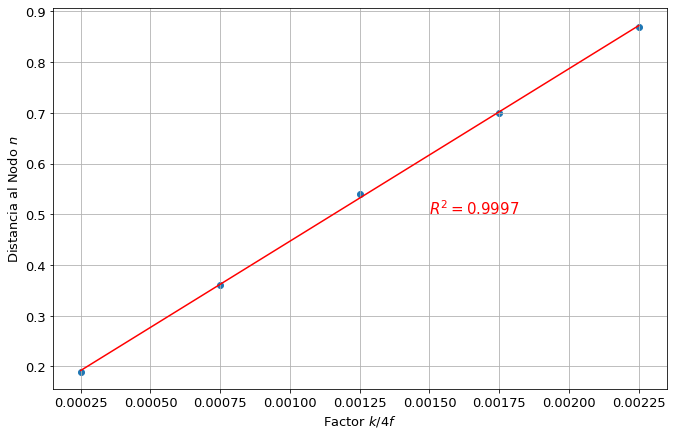

In [155]:
plt.rcParams.update({'font.size': 13})

plt.figure(figsize = (11, 7))
plt.scatter(factor1, distance1)
plt.plot(_factor1, _distance1, color = "r")
plt.text(0.0015, 0.5, r"$R^2 = %s$"%(R2_I1), color = 'r', fontsize = 15)
plt.xlabel(r"Factor $k/4f$", fontsize = 13)
plt.ylabel(r"Distancia al Nodo $n$", fontsize = 13)
plt.grid()
plt.savefig("Value 1.pdf")

In [133]:
mean1 = np.sum(data1["wavelenght"])/len(data1["wavelenght"])
mean1*data1["frequency"][0]*1000

491.6

In [134]:
path2 = "C:/Users/Darck/Ondas y Fluidos/Frecuencia 2.csv"

data2 = pd.read_csv(path2, sep = ";")
data2

,distance,nodes,wavelenght,frequency
0,0.10,1,0.400,1.5
1,0.22,2,0.290,0.0
2,0.34,3,0.272,0.0
3,0.46,4,0.262,0.0
4,0.58,5,0.257,0.0


In [135]:
factor2 = k/(4*(data2["frequency"][0]*1000))
distance2 = data2["distance"]
_factor2, _distance2, m2, b2 = GetRegression(factor2, distance2)
R2_I2 = round(GetR2(m2, b2, factor2, distance2), 4)
m2_i, b2_i = GetUncertainty(m2,b2,factor2,distance2)
"La velocidad en este caso será de {} +/- {}".format(np.round(m2, 1), m2_i)

'La velocidad en este caso será de 360.0 +/- 2.0733247781937863e-13'

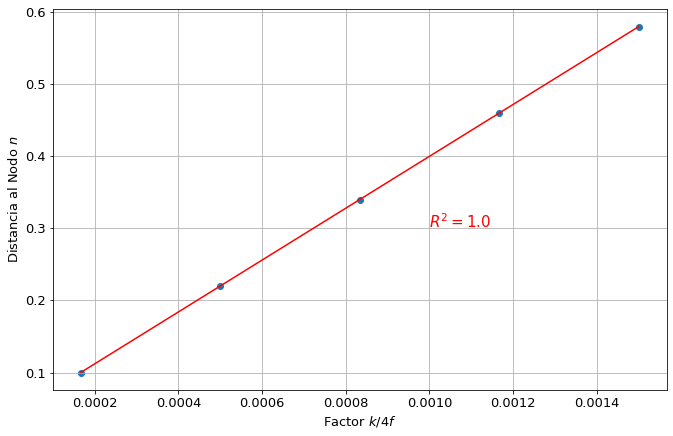

In [154]:
plt.figure(figsize = (11, 7))
plt.scatter(factor2, distance2)
plt.plot(_factor2, _distance2, color = "r")
plt.text(0.0010, 0.3, r"$R^2 = %s$"%(R2_I2), color = 'r', fontsize = 15)
plt.xlabel(r"Factor $k/4f$", fontsize = 13)
plt.ylabel(r"Distancia al Nodo $n$", fontsize = 13)
plt.grid()
plt.savefig("Value 2.pdf")

In [144]:
mean2 = np.sum(data2["wavelenght"])/len(data2["wavelenght"])
mean2*data2["frequency"][0]*1000

444.2999999999999

In [137]:
path3 = "C:/Users/Darck/Ondas y Fluidos/Frecuencia 3.csv"

data3 = pd.read_csv(path3, sep = ";")
data3

,distance,nodes,wavelenght,frequency
0,0.10,1,0.400,1.6
1,0.21,2,0.280,0.0
2,0.31,3,0.248,0.0
3,0.43,4,0.245,0.0
4,0.53,5,0.235,0.0


In [138]:
factor3 = k/(4*(data3["frequency"][0]*1000))
distance3 = data3["distance"]
_factor3, _distance3, m3, b3 = GetRegression(factor3, distance3)
R2_I3 = round(GetR2(m3, b3, factor3, distance3), 4)
m3_i, b3_i = GetUncertainty(m3,b3,factor3,distance3)
"La velocidad en este caso será de {} +/- {}".format(np.round(m3, 0), np.round(m3_i, 0))

'La velocidad en este caso será de 346.0 +/- 5.0'

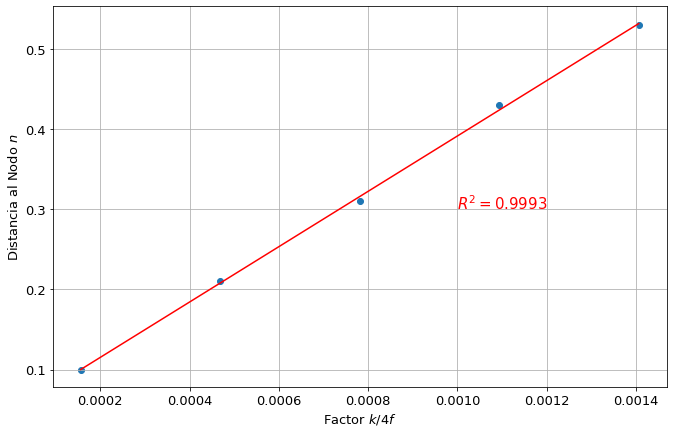

In [156]:
plt.figure(figsize = (11, 7))
plt.scatter(factor3, distance3)
plt.plot(_factor3, _distance3, color = "r")
plt.text(0.0010, 0.3, r"$R^2 = %s$"%(R2_I3), color = 'r', fontsize = 15)
plt.xlabel(r"Factor $k/4f$", fontsize = 13)
plt.ylabel(r"Distancia al Nodo $n$", fontsize = 13)
plt.grid()
plt.savefig("Value 3.pdf")

In [145]:
mean3 = np.sum(data3["wavelenght"])/len(data3["wavelenght"])
mean3*data3["frequency"][0]*1000

450.55999999999995

In [140]:
path4 = "C:/Users/Darck/Ondas y Fluidos/Frecuencia 4.csv"

data4 = pd.read_csv(path4, sep = ";")
data4

,distance,nodes,wavelenght,frequency
0,0.090,1,0.360,1.7
1,0.200,2,0.280,0.0
2,0.295,3,0.236,0.0
3,0.395,4,0.225,0.0
4,0.495,5,0.220,0.0


In [143]:
factor4 = k/(4*(data4["frequency"][0]*1000))
distance4 = data4["distance"]
_factor4, _distance4, m4, b4 = GetRegression(factor4, distance4)
R2_I4 = round(GetR2(m4, b4, factor4, distance4), 4)
m4_i, b4_i = GetUncertainty(m4,b4,factor4,distance4)
"La velocidad en este caso será de {} +/- {}".format(np.round(m4, 0), np.round(m4_i, 0))

'La velocidad en este caso será de 342.0 +/- 4.0'

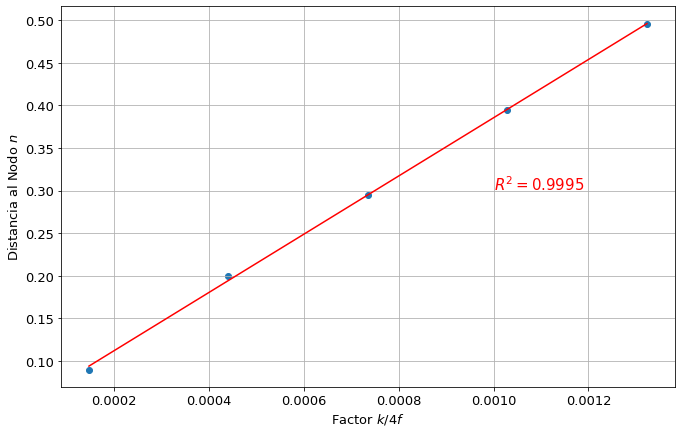

In [157]:
plt.figure(figsize = (11, 7))
plt.scatter(factor4, distance4)
plt.plot(_factor4, _distance4, color = "r")
plt.text(0.0010, 0.3, r"$R^2 = %s$"%(R2_I4), color = 'r', fontsize = 15)
plt.xlabel(r"Factor $k/4f$", fontsize = 13)
plt.ylabel(r"Distancia al Nodo $n$", fontsize = 13)
plt.grid()
plt.savefig("Value 4.pdf")

In [146]:
mean4 = np.sum(data4["wavelenght"])/len(data4["wavelenght"])
mean4*data4["frequency"][0]*1000

449.14